# Restaurant Delivery Time Prediction

### Task_1 and Task_2:

1. Predict delivery time and accuracy in training and validation set.
2. Predict the delivery time in the test set.

### Team Name: The Brown Coders
1. Yashowardhan Shinde
2. Aryan Kenchappagol
3. Akalbir Singh Chadha

#### Aim: Predict the delivery time of a restaurant depending on different factors.
#### Importing the necessary pacakges for data visualization and analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the dataset and checking the type of data in the data frame.

In [2]:
df = pd.read_excel("data_train.xlsx")
df.dtypes

Restaurant       object
Location         object
Cuisines         object
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
dtype: object

In [3]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


### We can observe the data is not in numerical format.
#### Converting this data into numerical format and cleaning the data.
1. Removing NULL values from Different columns.
2. Filling the cells with - with the mean of that column.

In [4]:
# Drop the New Restaurants with no data
for i in range(len(df)-1, -1, -1):
    if df.iloc[i, 5] == "NEW":
        df.drop(index = [i], inplace = True)
df.head(10)
df.index = [i for i in range(len(df))]
#df.index

# Average_Cost Column
# avg_cost = set(df["Average_Cost"])
avg_cost = list(df["Average_Cost"])
for i in range(len(df)):
    if len(avg_cost[i]) == 6:
        avg_cost[i] = int(avg_cost[i][1]+avg_cost[i][3:])
    else:
        avg_cost[i] = int(avg_cost[i][1:])
df["Average_Cost"] = avg_cost
#df.head()


# Minimum_Cost Column
# Removing the prefix
min_cost = set(df["Minimum_Order"])
min_cost = list(df["Minimum_Order"])

for i in range(len(df)):
    min_cost[i] = int(min_cost[i][1:])
    
df["Minimum_Order"] = min_cost
#df.head()


# Votes and Reviews Column:
# These columns have - values therefore convert them to int (0)
# Reiterate over the column and assign the cell with value 0 mean value of that column
x = list(df["Votes"])
y = list(df["Reviews"])
for i in range(0, len(x)):
    try:
        x[i] = int(x[i])
    except:
        x[i] = 0
    
for i in range(0, len(y)):
    try:
        y[i] = int(y[i])
    except:
        y[i] = 0
        
ex_x = x.count(0)
ex_y = y.count(0)
mean_x = int(sum(x)/(len(x)-ex_x))
mean_y = int(sum(y)/(len(y)-ex_y))

for j in range(len(x)):
    if x[j] == 0:
        x[j] = mean_x

for j in range(len(y)):
    if y[j] == 0:
        y[j] = mean_y
        
#ex_x = x.count(0)
#ex_y = y.count(0)
#ex_x, ex_y

df["Votes"] = x
df["Reviews"] = y
#df.head(10)

# Delivery_Time Column:
# Time is in form of string so removing the prefix and conerting it to int data
time = list(df["Delivery_Time"])
for i in range(len(df)):
    time[i] = int(time[i][:2])
    
df["Delivery_Time"] = time 
#df.head()

# Location Column:
# There are 35 different location therefore One Hot Encoding is not a practical option
# Converting it to numerial data with each location having a unique numerical value
# 1-35
loc = list(set(df["Location"]))
map_loc = {}

for i in range(len(loc)):
    map_loc[loc[i]] = i+1
    
#map_loc
loc = list(df["Location"])

for i in range(0, len(df)):
    loc[i] = map_loc[loc[i]]
    
df["Location"] = loc
#df.head(10)


# Cuisine Column:
# The individual cuisines cannot be analysed therefore converting it to a numerical quantity
# Instead of individual cuisines considering the number of cuisines a restaurant serves
food = list(df["Cuisines"])

for i in range(len(food)):
    x = list(food[i].split(", "))
    food[i] = len(x)
    
df["Cuisines"] = food


# Rating Column
# This column has many string values along with numerical data
# Dropping the string data rows
d = list(set(df["Rating"]))
d.sort()
for i in range(len(df)-1,0,-1):
    if df.iloc[i, 5] == d[-1] or df.iloc[i, 5] == d[-2] or df.iloc[i, 5] == d[0]:
        df.drop(i, inplace = True)
        
d = list(set(df["Rating"]))
d.sort()

d = list(df["Rating"])
d = list(map(float, d))
df["Rating"] = d
df.dropna(inplace = True)
df.index = [i for i in range(len(df))]

df.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,15,5,200,50,3.5,12,4,30
1,ID_2882,33,2,100,50,3.5,11,4,30
2,ID_1595,20,3,150,50,3.6,99,30,65
3,ID_5929,18,3,250,99,3.7,176,95,30
4,ID_6123,10,2,200,99,3.2,521,235,65
5,ID_5221,10,3,150,50,3.8,46,18,30
6,ID_3777,20,2,150,50,3.7,108,31,30
7,ID_745,25,3,650,50,4.0,1731,1235,45
8,ID_2970,25,2,100,50,3.9,110,26,30
9,ID_3474,18,6,200,50,3.9,562,294,65


## Data Visualization:

#### HeatMap:

The heat map will give a clear idea of how different quantities aredependent on each other.

[]

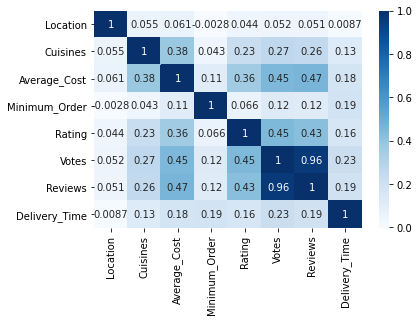

In [5]:
sns.heatmap(df.corr(), annot = True, cmap ="Blues")
plt.plot()

**As we can see from the heat map above the delivery time is not dependent on the location so we can drop this column and we also observe that Reviews and Votes have a very high relation so both the columns will have similar effect on delivery time so we can drop one of the columns here I will drop the Reviews**

#### Scatter Plot:

Plot a scatter plot of Delivery Time with every other quantity to find relations between those quantities. 

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\hp\app

[]

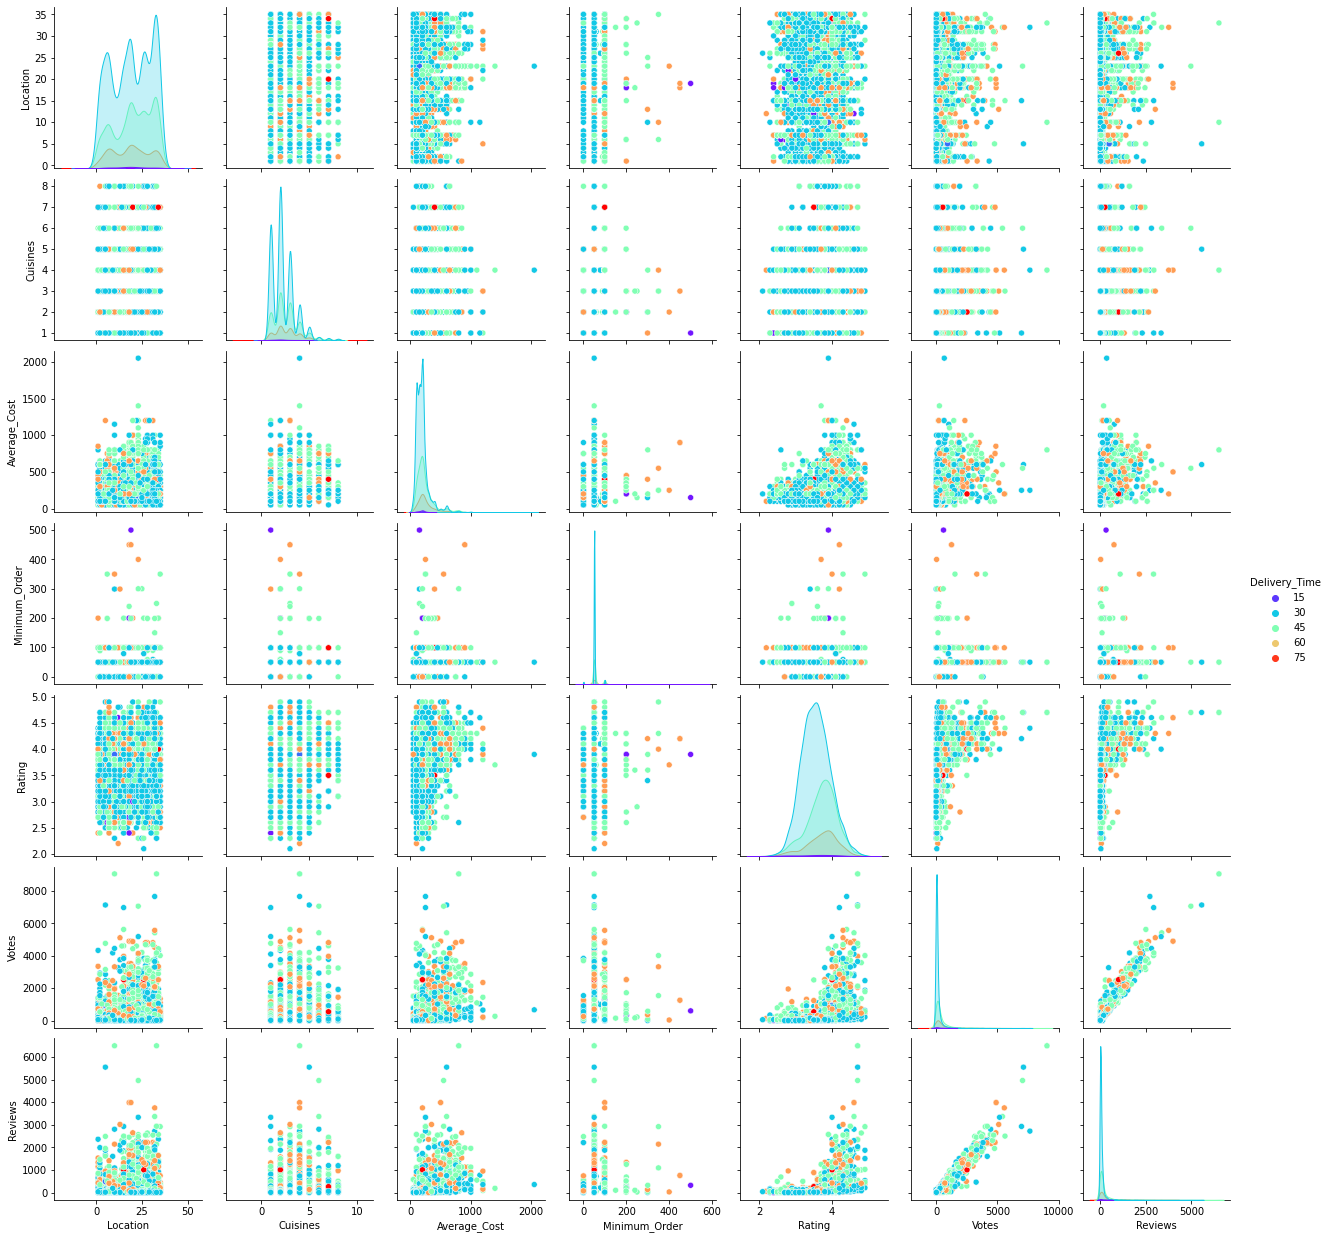

In [6]:
sns.pairplot(df, hue = 'Delivery_Time', palette = 'rainbow')
plt.plot()

### Box Plot:
Using the box plot we can get to know about the outliers in our dataset and we can remove these outliers

[]

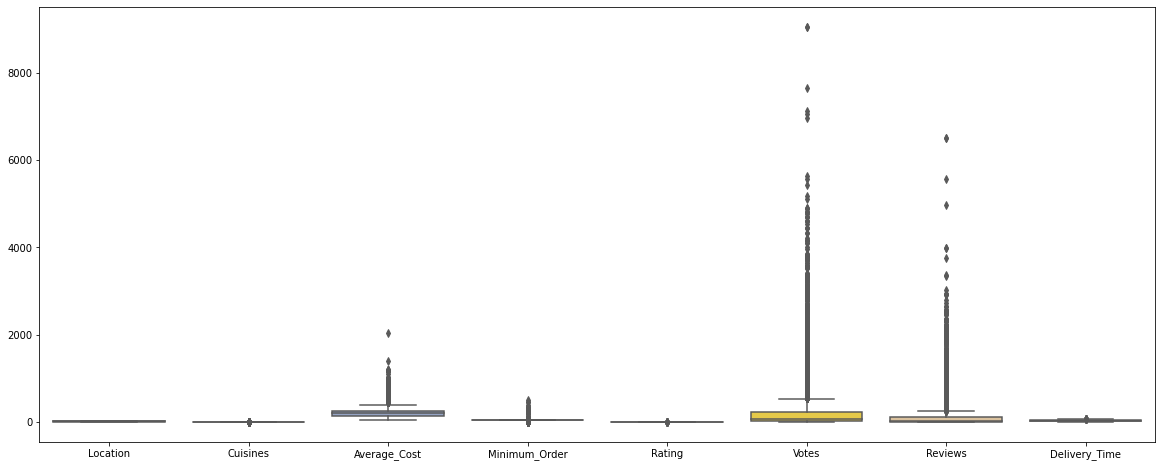

In [7]:
fig = plt.figure(figsize = (20, 8))
sns.boxplot(data = df, orient = "v", palette = "Set2")
plt.plot()

**From the above boxplot it is clear that there are many outliers and these need to be fixed so we will remove all the outlier values**

In [8]:
for i in range(len(df)-1, -1, -1):
    if df.iloc[i, 4] > 100 or df.iloc[i, 6] > 78 or df.iloc[i, 3] > 300:
        df.drop(index = i, inplace = True)

[]

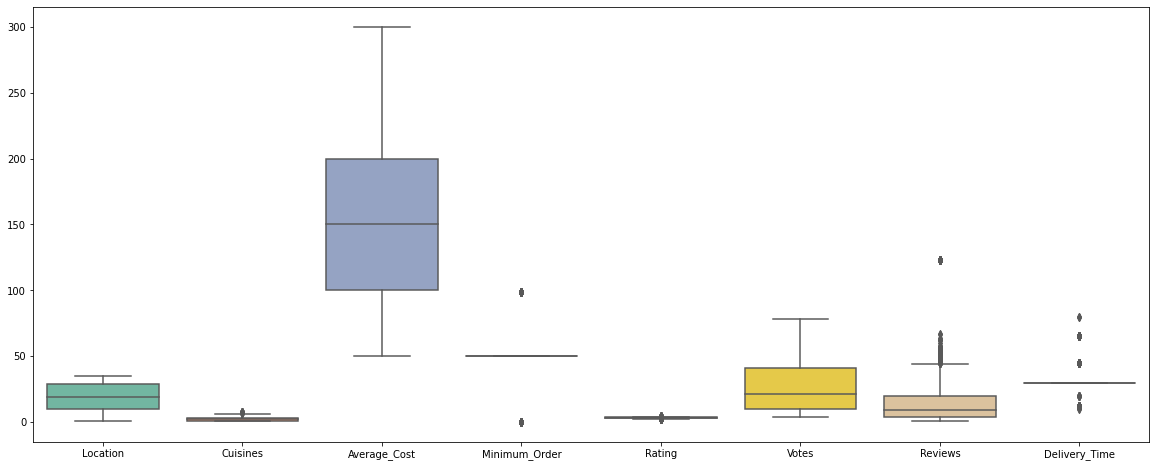

In [9]:
fig = plt.figure(figsize = (20, 8))
sns.boxplot(data = df, orient = "v", palette = "Set2")
plt.plot()

**After removing most of the outliers the box plot looks like the one above graph we have a few outliers in the Minimum Order category and Delivery time but we won't do anything about these as Delivery Time is Our Target Variable.**

Dropping the columns which are not required:
1. Location
2. Reviews

In [10]:
df.drop(columns=["Reviews", "Location"], inplace = True)
df.dtypes

Restaurant        object
Cuisines           int64
Average_Cost       int64
Minimum_Order      int64
Rating           float64
Votes              int64
Delivery_Time      int64
dtype: object

### Data Preparation for Feeding the Data to our Model:

Using the Train Test Split Model From Sklearn library we will divide the Data In ratio 2:1 that is 67% training data and 33% testing data.

In [11]:
X = df.iloc[:, 1:6].values
#X = X.reshape(-1,1)
Y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

df.head()

,Restaurant,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Delivery_Time
0,ID_6321,5,200,50,3.5,12,30
1,ID_2882,2,100,50,3.5,11,30
5,ID_5221,3,150,50,3.8,46,30
13,ID_6891,1,100,50,3.5,23,30
17,ID_1681,4,200,99,2.8,67,45


### Selecting a Model for Prediction:

**We will first use a regression model and observe its output but it is anticipated that Mulptiple Linear Regression wouldn't have a good accuracy as there is no visible linear pattern in the scatter plots**

In [12]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()
reg.fit(x_train, y_train)

pred = x_test

result = reg.predict(pred)

res = pd.DataFrame((y_test, result), index = ['Expected', 'Predicted']).T
res.head()

,Expected,Predicted
0,30.0,33.856927
1,30.0,34.632843
2,30.0,33.755726
3,65.0,31.788730
4,30.0,32.864879


### Evaluation of the Model:

We will calculate the R2 Score and the MAE Score of the Model. As you can see below the accuracy as well as te MAE score of the Linear model is quite bad so we will try to boost the model using xgboost and observe the change

In [16]:
from sklearn import metrics
r2_score = metrics.r2_score(y_test, result)
print("The accuracy of the Model is :",r2_score)

mae = metrics.mean_absolute_error(y_test, result)
print("The MAE Score of the moel is :",mae)

The accuracy of the Model is : 0.1256048996665423
The MAE Score of the moel is : 5.649130267086001


In [19]:
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
                                         learning_rate = 0.25, loss = 'ls')
clf.fit(x_train, y_train)
result = clf.predict(x_test)

In [21]:
from sklearn import metrics
r2_score = metrics.r2_score(y_test, result)
print("The Acc of the model is :",r2_score)

mae = metrics.mean_absolute_error(y_test, result)
print("The MAE Score of the Model is :",mae)

The Acc of the model is : 0.008773514173975538
The MAE Score of the Model is : 5.346541168143983


**It is observed that even after using Xgboost there is no improvement in our model so Regression isn't the way to go we will now try Decision Tree as this problem has few traget values.**

### Preparing a Decision Tree Model:

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


pred = dtree.predict(x_test)


comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

acc = dtree.score(x_test, y_test)
print('\nThe accuracy of the classifier is:', acc)
#comp.head()

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

comp.head()


The accuracy of the classifier is: 0.7721518987341772
4.5430379746835445


,Original,Predicted,Diff
0,30,30,0
1,30,30,0
2,30,30,0
3,65,30,35
4,30,30,0


**We can observe that we getan accuracy of about 77% and a MAE Score of 0.27 using a Desicion Tree. Now we will check the accuracy using a Random Forest Classifier which are considered to be more robust than a Desicion Tree.**

### Preparing a Random Forest Classifier:

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=128)
classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)
#print(pred)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

score = metrics.r2_score(y_test, pred)
score = classifier.score(x_test, y_test)

mae = metrics.mean_absolute_error(y_test, pred)
print(mae)

print('\nThe accuracy of the classifier is:', score)
comp.head()

3.6151898734177217

The accuracy of the classifier is: 0.8189873417721519


,Original,Predicted,Diff
0,30,30,0
1,30,30,0
2,30,30,0
3,65,30,35
4,30,30,0


**And as we can clearly see that the Random Forest Gives a better Accuracy of about 82% and a better MAE Score of 3.6 so, we will be using the Random Forest Classifier for this Prediction Task**

### Predict the Delivery Time of the Test DataSet:

1. Loading the dataset and formatting the data into numerical form so that it can be used for prediction
2. Using Classifier from RandomForestClassifier we will predict the values of the delivery time

In [26]:
df = pd.read_excel("Data_Test.xlsx")
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [27]:
# Drop the New Restaurants with no data
for i in range(len(df)-1, -1, -1):
    if df.iloc[i, 5] == "NEW":
        df.drop(index = [i], inplace = True)
df.head(10)
df.index = [i for i in range(len(df))]
#df.index

# Average_Cost Column
# avg_cost = set(df["Average_Cost"])
avg_cost = list(df["Average_Cost"])
for i in range(len(df)):
    if len(avg_cost[i]) == 6:
        avg_cost[i] = int(avg_cost[i][1]+avg_cost[i][3:])
    else:
        avg_cost[i] = int(avg_cost[i][1:])
df["Average_Cost"] = avg_cost
#df.head()


# Minimum_Cost Column
# Removing the prefix
min_cost = set(df["Minimum_Order"])
min_cost = list(df["Minimum_Order"])

for i in range(len(df)):
    min_cost[i] = int(min_cost[i][1:])
    
df["Minimum_Order"] = min_cost
#df.head()


# Votes and Reviews Column:
# These columns have - values therefore convert them to int (0)
# Reiterate over the column and assign the cell with value 0 mean value of that column
x = list(df["Votes"])
y = list(df["Reviews"])
for i in range(0, len(x)):
    try:
        x[i] = int(x[i])
    except:
        x[i] = 0
    
for i in range(0, len(y)):
    try:
        y[i] = int(y[i])
    except:
        y[i] = 0
        
ex_x = x.count(0)
ex_y = y.count(0)
mean_x = int(sum(x)/(len(x)-ex_x))
mean_y = int(sum(y)/(len(y)-ex_y))

for j in range(len(x)):
    if x[j] == 0:
        x[j] = mean_x

for j in range(len(y)):
    if y[j] == 0:
        y[j] = mean_y
        
#ex_x = x.count(0)
#ex_y = y.count(0)
#ex_x, ex_y

df["Votes"] = x
df["Reviews"] = y
#df.head(10)

# Location Column:
# There are 35 different location therefore One Hot Encoding is not a practical option
# Converting it to numerial data with each location having a unique numerical value
# 1-35
loc = list(set(df["Location"]))
map_loc = {}

for i in range(len(loc)):
    map_loc[loc[i]] = i+1
    
#map_loc
loc = list(df["Location"])

for i in range(0, len(df)):
    loc[i] = map_loc[loc[i]]
    
df["Location"] = loc
#df.head(10)


# Cuisine Column:
# The individual cuisines cannot be analysed therefore converting it to a numerical quantity
# Instead of individual cuisines considering the number of cuisines a restaurant serves
food = list(df["Cuisines"])

for i in range(len(food)):
    x = list(food[i].split(", "))
    food[i] = len(x)
    
df["Cuisines"] = food


# Rating Column
# This column has many string values along with numerical data
# Dropping the string data rows
d = list(set(df["Rating"]))
d.sort()
for i in range(len(df)-1,0,-1):
    if df.iloc[i, 5] == d[-1] or df.iloc[i, 5] == d[-2] or df.iloc[i, 5] == d[0]:
        df.drop(i, inplace = True)
        
d = list(set(df["Rating"]))
d.sort()

d = list(df["Rating"])
d = list(map(float, d))
df["Rating"] = d
df.dropna(inplace = True)
df.index = [i for i in range(len(df))]

df.head(10)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,32,3,350,50,4.2,361,225
1,ID_4620,18,1,100,50,3.6,36,16
2,ID_5470,4,5,200,50,3.6,66,33
3,ID_3249,18,2,150,50,2.9,38,14
4,ID_506,31,2,100,50,3.4,16,11
5,ID_8321,28,2,200,50,3.3,72,10
6,ID_4559,33,3,150,50,3.8,46,29
7,ID_2869,7,1,200,50,3.2,5,2
8,ID_2728,25,2,350,50,3.6,123,63
9,ID_494,18,1,100,50,3.1,9,1


In [29]:
X = df.iloc[:, 2:7].values
pred = classifier.predict(X)
df["Predicted Delivery Time"] = pred
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Predicted Delivery Time
0,ID_2842,32,3,350,50,4.2,361,225,30
1,ID_4620,18,1,100,50,3.6,36,16,30
2,ID_5470,4,5,200,50,3.6,66,33,30
3,ID_3249,18,2,150,50,2.9,38,14,30
4,ID_506,31,2,100,50,3.4,16,11,30


**Successfully predicted the delivery time of the data in the Test File**